#Titanic survived Project

Project Description
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It
gives you information about multiple people like their ages, sexes, sibling counts, embarkment
points, and whether or not they survived the disaster.
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive
the sinking or not.

Dataset Link-
https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv

In [1]:
# Importing the required library 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
#We have survived as the target variable whereas the rest of them are features

In [6]:
df.shape
print("The number of columns: ", df.shape[1])
print("The number of rows: ", df.shape[0])

The number of columns:  12
The number of rows:  891


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [9]:
# Count of the unique values under 
df['Ticket'].nunique()

681

In [10]:
df['Embarked'].nunique()

3

In [11]:
#Getting the information about the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
# check the count of the missing value.
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

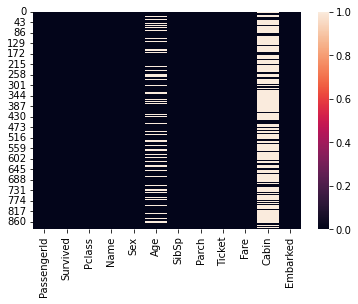

In [13]:
#Lets visualise it using the heat map.
sns.heatmap(df.isnull())

In [14]:
#Working on the missing data in 'Cabin' value. Since there are 687 missing values from the data, therefore we shall  
titanic_data = df.drop(columns='Cabin',axis=1)

In [146]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [147]:
# Working on the age column as there are  177 are missing values in the data frame. We will replace the missing data by the mean values. 
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [148]:
# checking the mode.  
titanic_data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [149]:
df.nunique().to_frame("No. of unique value")

,No. of unique value
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [150]:
print(titanic_data['Embarked'].mode()[0])

S


In [151]:
# we will replace the 2 missing value present in the data with the mode value as the datatype is onject therefore the preferred ethod is to replace the values by mode. 
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)

In [152]:
#To check the working of the above codes we will once again check for the missing values in the dataframe. 
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [153]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


0    549
1    342
Name: Survived, dtype: int64


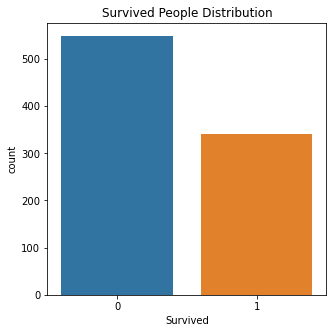

In [154]:
# Represting the no. of people who survived on the countplot. 

plt.figure(figsize=(5, 5))
sns.countplot(x='Survived', data=titanic_data)
plt.title('Survived People Distribution')
print(titanic_data['Survived'].value_counts())
plt.show()

male      577
female    314
Name: Sex, dtype: int64


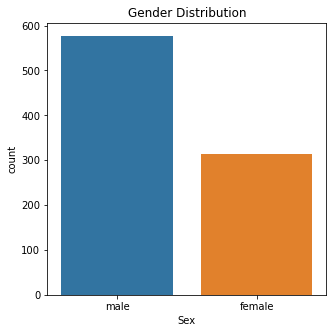

In [155]:
# Survival of the male and female. 
plt.figure(figsize=(5, 5))
sns.countplot(x='Sex', data=titanic_data)
plt.title('Gender Distribution')
print(titanic_data['Sex'].value_counts())
plt.show()

It is observed that the more no. of female survived in the accident. 

3    491
1    216
2    184
Name: Pclass, dtype: int64


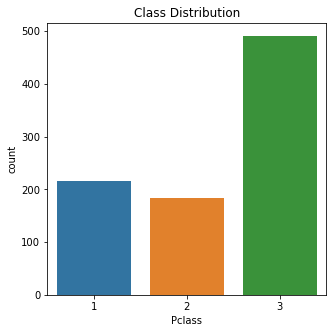

In [156]:
#
plt.figure(figsize=(5, 5))
sns.countplot(x='Pclass', data=titanic_data)
plt.title('Class Distribution')
print(titanic_data['Pclass'].value_counts())
plt.show()

The most number of people were associated with the class 3 

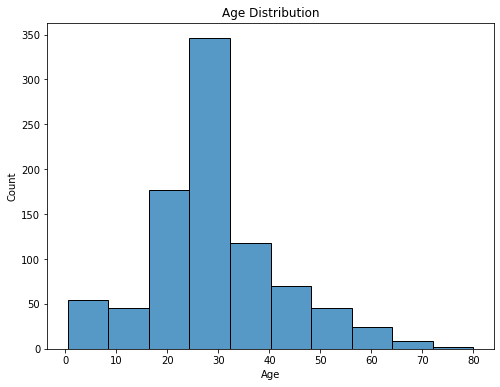

In [157]:
#Age
plt.figure(figsize=(8, 6))
sns.histplot(data=titanic_data, x='Age', bins=10)
plt.title('Age Distribution')
plt.show()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


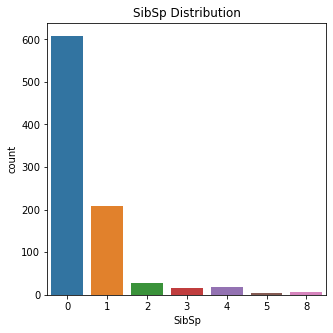

In [158]:
#SibSp
plt.figure(figsize=(5, 5))
sns.countplot(x='SibSp', data=titanic_data)
plt.title('SibSp Distribution')
print(titanic_data['SibSp'].value_counts())
plt.show()

S    646
C    168
Q     77
Name: Embarked, dtype: int64


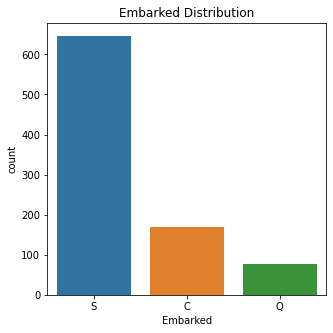

In [159]:
#
plt.figure(figsize=(5, 5))
sns.countplot(x='Embarked', data=titanic_data)
plt.title('Embarked Distribution')
print(titanic_data['Embarked'].value_counts())
plt.show()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


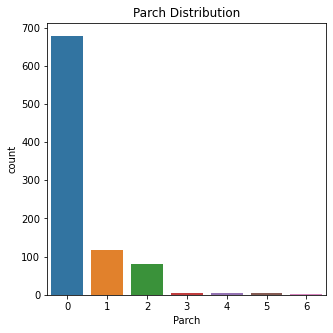

In [160]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Parch', data=titanic_data)
plt.title('Parch Distribution')
print(titanic_data['Parch'].value_counts())
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='count'>

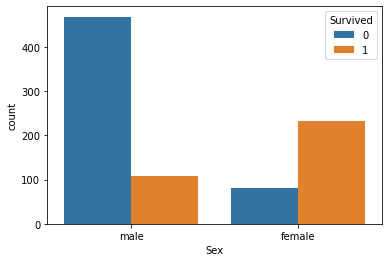

In [161]:
# Checking the relation of the survived people with the gender. 
sns.countplot('Sex',hue='Survived',data= titanic_data)

Its is observed that despite more number of male priority was given to save the female. 

<AxesSubplot:xlabel='Pclass', ylabel='count'>

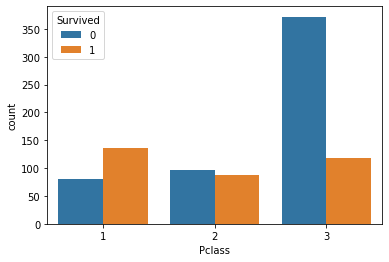

In [15]:
# Checking the distribution of the prople who survived in the pclass.
sns.countplot('Pclass',hue='Survived',data= titanic_data)

In class 1 and 2 more number of people survived, where as in class 3 the no. of people who died is more. 

<AxesSubplot:xlabel='Age', ylabel='Count'>

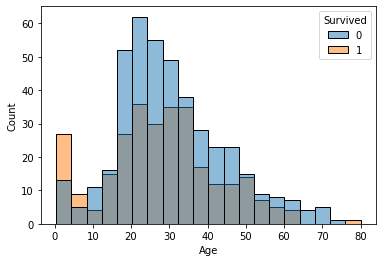

In [16]:
# Checking the distribution of the people who survived basis their age.
sns.histplot(x='Age', hue='Survived', data=titanic_data)


<AxesSubplot:xlabel='SibSp', ylabel='count'>

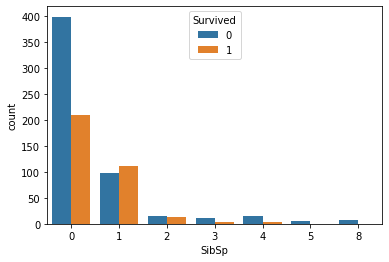

In [17]:
#
sns.countplot(x='SibSp', hue='Survived', data=titanic_data)

<AxesSubplot:xlabel='Parch', ylabel='count'>

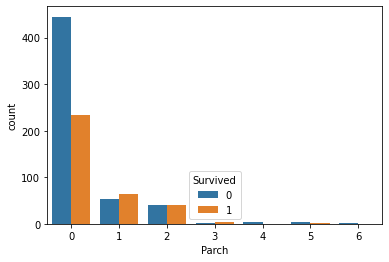

In [18]:
#displaying the survival and the parch relation. 
sns.countplot('Parch',hue='Survived',data= titanic_data)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

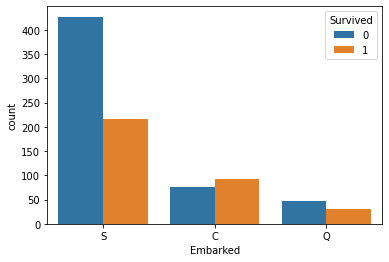

In [19]:
#displaying the survival and the parch relation. 
sns.countplot('Embarked',hue='Survived',data= titanic_data)

The most number of people who survived belongs to the S Class.

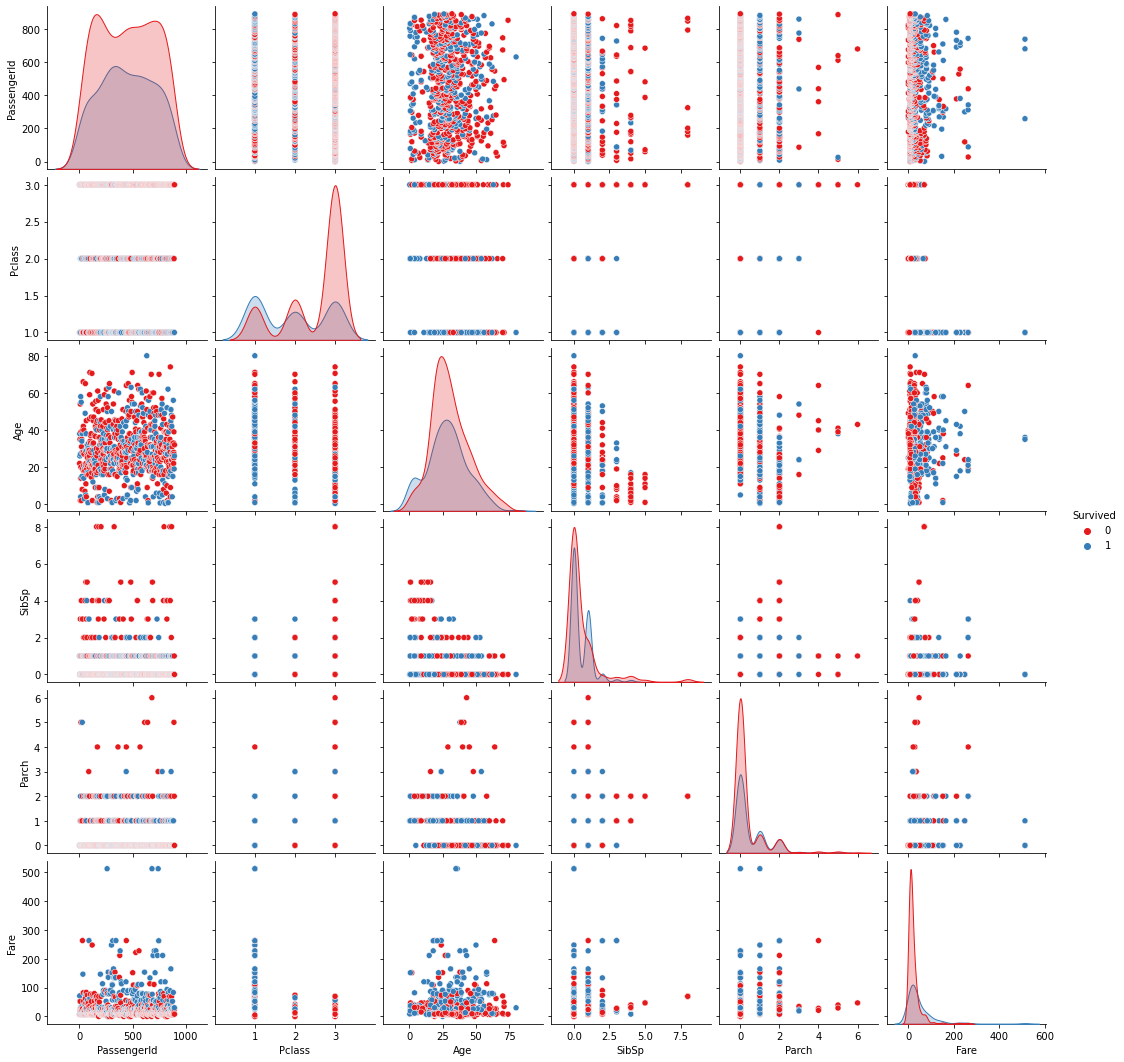

In [20]:
#Multivirate_analysis
sns.pairplot(titanic_data,hue="Survived",palette="Set1")

Observation: 
Fare and Survived: Passengers who paid higher fares are seen to have higher rate of survival. 
Pclass and Survived: Passengers in the first class have a higher survival rate compared to those in the second and third classes.
Sex and Survived: Females have a significantly higher survival rate compared to males

In [21]:
# Encoding the categorical columns('sex and the embarked')
titanic_data.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)

In [22]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0.0


In [23]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    float64
dtypes: float64(3), int64(6), object(2)
memory usage: 76.7+ KB


It is stated that the valued of sex column and the embarked columns has been changed with the int64 Dtype.  

In [171]:
#divinding the data into the labels and the features. 
X =  titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'])
Y = titanic_data['Survived']

In [172]:
#checking the correlation between the data. 
titanic_data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.116569
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


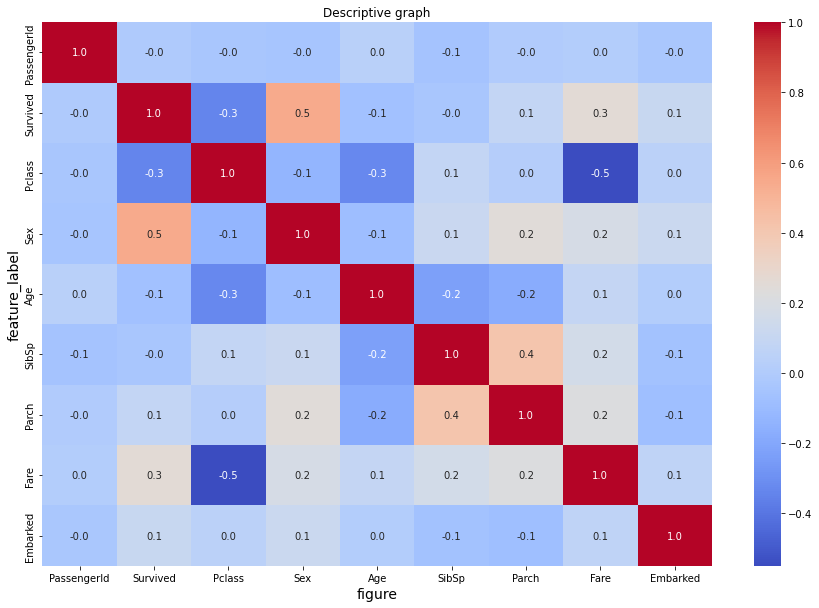

In [173]:

# Plotting the correlation on the graph. 
plt.figure(figsize=(15,10))
sns.heatmap(titanic_data.corr(), annot=True, linecolor="black", cmap="coolwarm", fmt="0.1f")
plt.title("Descriptive graph")
plt.xlabel('figure',fontsize=14)
plt.ylabel('feature_label',fontsize=14)
plt.show()

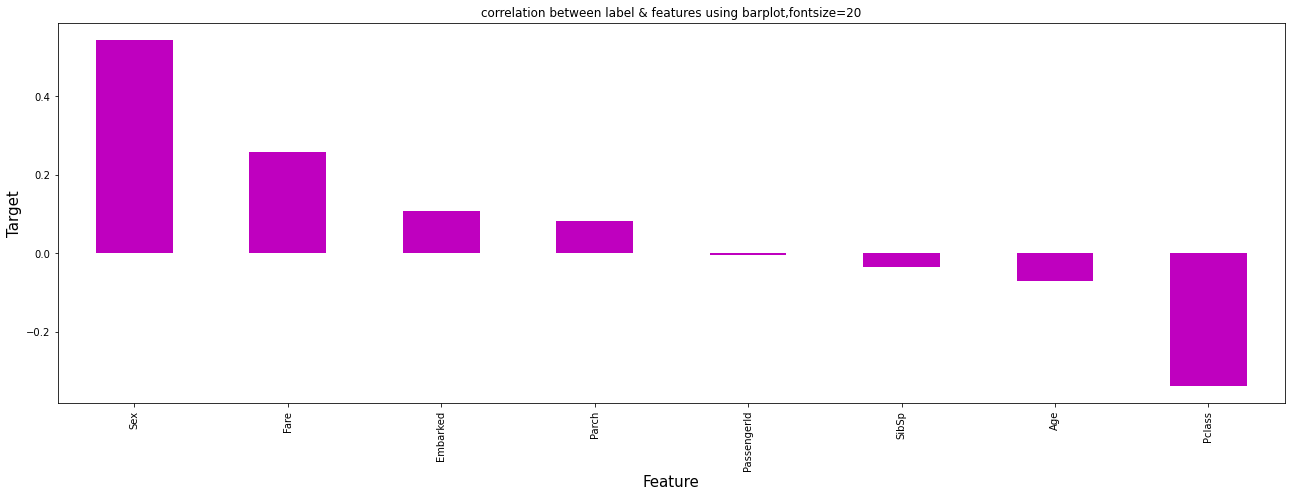

In [174]:
#Visualizing the correlation between label and feature using bar plot.
plt.figure(figsize=(22,7))
titanic_data.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color="m")
plt.xlabel('Feature',fontsize=15)
plt.ylabel ('Target', fontsize=15)
plt.title("correlation between label & features using barplot,fontsize=20")
plt.show()

In [107]:
# seperating the categorical and the numerical data. 

categorical_col = []
for i in titanic_data.dtypes.index:
    if titanic_data.dtypes[i]=="object": 
        categorical_col.append(i)
print("Categorical Columns :  ",categorical_col)
print("/n")

numerical_col = []
for i in titanic_data.dtypes.index:
    if titanic_data.dtypes[i] != "object": 
        numerical_col.append(i)
print("Numerical Columns :  ",numerical_col)
print("/n")

Categorical Columns :   ['Name', 'Ticket']
/n
Numerical Columns :   ['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
/n


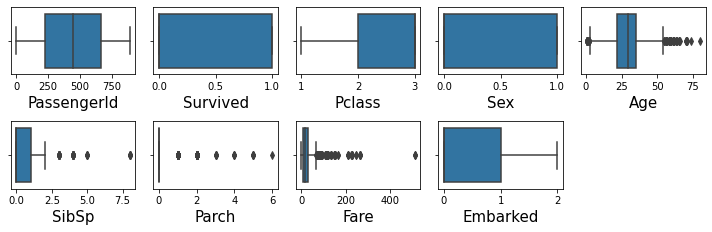

In [175]:
# Checking for the skewness in the dataframe.
plt.figure(figsize =(10,6))
plotnumber = 1

for col in numerical_col:
    if plotnumber<=9:
        ax = plt.subplot(4,5,plotnumber)
        sns.boxplot(titanic_data[col])
        plt.xlabel(col,fontsize=15)
        plt.xticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [177]:
#There are no outliers observed in the target variable, where as we see outliers in Age, SibSp and Parch. 

In [178]:
#Checking the skewness of the data
titanic_data.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex            0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked       1.543397
dtype: float64

Observation of the skewness : the threshold is taken as +/-65, the columns with skewness are : 
        -SibSp
        -Parch
        -Fare 
        -Embarked 

In [182]:
from scipy.stats import zscore
out_features=titanic_data[['Age','Fare','SibSp','Parch']]
z=np.abs(zscore(out_features))
z


,Age,Fare,SibSp,Parch
0,0.592481,0.502445,0.432793,0.473674
1,0.638789,0.786845,0.432793,0.473674
2,0.284663,0.488854,0.474545,0.473674
3,0.407926,0.420730,0.432793,0.473674
4,0.407926,0.486337,0.474545,0.473674
...,...,...,...,...
886,0.207709,0.386671,0.474545,0.473674
887,0.823344,0.044381,0.474545,0.473674
888,0.000000,0.176263,0.432793,2.008933
889,0.284663,0.044381,0.474545,0.473674


In [183]:
#threshold=3
np.where(z>3)

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
        119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
        299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
        527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
        689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
        824, 846, 850, 851, 858, 863, 885], dtype=int64),
 array([3, 2, 3, 1, 2, 2, 2, 2, 3, 1, 0, 0, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2,
        1, 2, 2, 2, 1, 1, 2, 1, 3, 1, 1, 2, 3, 1, 3, 2, 0, 1, 2, 2, 1, 3,
        3, 0, 3, 0, 3, 1, 2, 2, 1, 1, 1, 1, 3, 1, 1, 0, 3, 1, 2, 2, 2, 2,
        2, 2, 0, 3, 2, 3], dtype=int64))

In [184]:
z.iloc[745,1]

0.7811411367084872

In [190]:
titanic_data1 = titanic_data[(z < 3).all(axis=1)]
print(titanic_data1.shape)

(820, 11)


In [191]:
#Calculate z-scores
z = np.abs(zscore(X))

#Filtering features and target for z-scores less than 3
X1 = X[(z < 3).all(axis=1)]
Y1 = Y[(z < 3).all(axis=1)]

In [192]:
# Shape of old and new dataframe
print("old Data Frame : ",titanic_data.shape[0])
print("New Data Frame : ",titanic_data1.shape[0])

old Data Frame :  891
New Data Frame :  820


In [206]:
print("Data Loss Percentage = ",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage =  7.968574635241302


<AxesSubplot:xlabel='Survived', ylabel='Density'>

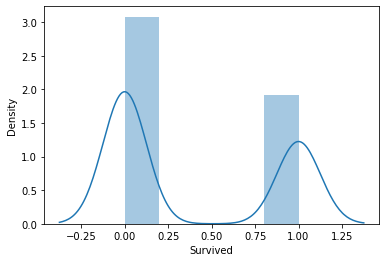

In [207]:
#Normal Distribition Curve
sns.distplot(titanic_data['Survived'])

This shows nearly normal distribution.

<AxesSubplot:xlabel='Age', ylabel='Density'>

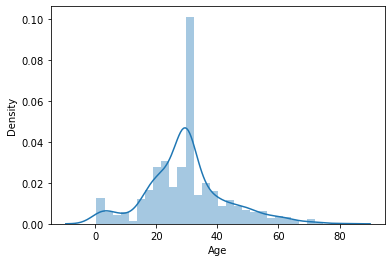

In [208]:
sns.distplot(titanic_data['Age'])

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

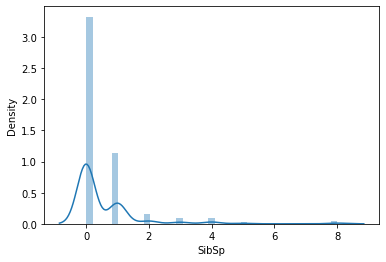

In [209]:
sns.distplot(titanic_data['SibSp'])             

In [210]:
X



,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [211]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Splitting the data into the training and the test data

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=22)
X_train  


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
793,1,0,29.699118,0,0,30.6958,1
814,3,0,30.500000,0,0,8.0500,0
43,2,1,3.000000,1,2,41.5792,1
269,1,1,35.000000,0,0,135.6333,0
538,3,0,29.699118,0,0,14.5000,0
...,...,...,...,...,...,...,...
358,3,1,29.699118,0,0,7.8792,2
356,1,1,22.000000,0,1,55.0000,0
812,2,0,35.000000,0,0,10.5000,0
132,3,1,47.000000,1,0,14.5000,0


# Model Training 

# LinearRegression


In [213]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [214]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [215]:
# Prection on the test data. 
y_pred1 = lr.predict(X_test)
y_pred2 = rfr.predict(X_test)
y_pred3 = gr.predict(X_test)
y_pred4 = dt.predict(X_test)
df2 = pd.DataFrame({'Actual': y_test, 'Lr': y_pred1, 'rfr': y_pred2, 'gr': y_pred3,'dt':y_pred4,})

In [216]:
df2

,Actual,Lr,rfr,gr,dt
816,0,0.669335,0.540000,0.544312,1.0
789,0,0.387547,0.200000,0.219784,0.0
869,1,0.165908,0.930000,0.908822,1.0
235,0,0.633662,0.718000,0.771150,1.0
473,1,0.869151,0.820833,0.917100,1.0
...,...,...,...,...,...
341,1,0.877437,0.860000,0.762218,1.0
389,1,0.900635,0.849833,0.917100,1.0
691,1,0.778263,0.740000,0.848881,1.0
698,0,0.312158,0.740000,0.679962,0.0


In [217]:
from sklearn import metrics
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [218]:
print(score1,score2,score3,score4)

0.35079025988154877 0.40375717363440167 0.3843657179528497 0.26623554218447254


In [219]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2= metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)

In [131]:
print(s1,s2,s3,s4)

0.30032640649801196 0.23898399593067685 0.27175392357342953 0.19162897933847656
